# Module 4: Labs Bivariate analysis - 2 qualitative variables


In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

## Labo 1 - Influence of background music on purchasing behaviour

Market research shows that background music in a supermarket can influence the purchasing behaviour of customers. A study compared three methods: no music, French chansons and Italian hits. In each case, the number of bottles of French, Italian and other wines sold was counted (Ryan, et al., 1998).

The research data can be found in the file data/MuziekWijn.csv.

1. Set up the correct crosstab.
2. Determine the marginal totals.
3. Determine the expected results.
4. Calculate the χ² test statistic.
5. Calculate Cramér's V. What can you conclude from this?

Visualize the data set:

1. Plot a bar chart showing the percentages of types of wine sold when no music was playing.
2. Plot a clustered bar chart of the dataset
3. Plot a bar chart (stacked bar chart) of the dataset

Results of the main calculations (rounded up to 3 decimal places):

* χ² ≈ 18.279
* Cramér's V ≈ 0.194

Read the dataset

In [2]:
music_wine = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/MuziekWijn.csv')
music_wine.head()

,Muziek,Wijn
0,Geen,Franse
1,Franse,Franse
2,Franse,Italiaanse
3,Italiaanse,Andere
4,Italiaanse,Franse


Give the names of both columns. What is wrong?

In [3]:
music_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Muziek  243 non-null    object
 1    Wijn   243 non-null    object
dtypes: object(2)
memory usage: 3.9+ KB


You can change the name of a column 'ab' to the column 'abc' of the dataframe df, using the following command

`df = df.rename(columns={'ab': 'abc'})`

Use this command to change the column name.  
Check afterwards if the result is correct.

In [5]:
music_wine = music_wine.rename(columns={' Wijn': 'Wijn'})
music_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Muziek  243 non-null    object
 1   Wijn    243 non-null    object
dtypes: object(2)
memory usage: 3.9+ KB


1. Set up the correct crosstab.

In [6]:
pd.crosstab(music_wine.Muziek, music_wine.Wijn, margins=True)

Wijn,Andere,Franse,Italiaanse,All
Muziek,,,,
Franse,35,39,1,75
Geen,43,30,11,84
Italiaanse,35,30,19,84
All,113,99,31,243


2. Determine the marginal totals.

In [7]:
observed = pd.crosstab(music_wine.Muziek, music_wine.Wijn)

# Marginal Totals
row_sums = observed.sum(axis=1)
col_sums = observed.sum()
n = row_sums.sum()

print(row_sums)
print(col_sums)
print(f"Number of observations: {n}")

Muziek
Franse        75
Geen          84
Italiaanse    84
dtype: int64
Wijn
 Andere        113
 Franse         99
 Italiaanse     31
dtype: int64
Number of observations: 243


3. Determine the expected results.

In [8]:
expected = np.outer(row_sums, col_sums) / n
print(expected)

[[34.87654321 30.55555556  9.56790123]
 [39.0617284  34.22222222 10.71604938]
 [39.0617284  34.22222222 10.71604938]]


In [9]:
# Check if marginal totals are still correct, yes
exp_row_sums = np.sum(expected, axis=1)
exp_col_sums = np.sum(expected, axis=0)

print(f'Row totals   : {exp_row_sums}')
print(f'Column totals: {exp_col_sums}')
print(f'Observations : {exp_col_sums.sum()}')

Row totals   : [75. 84. 84.]
Column totals: [113.  99.  31.]
Observations : 243.0


4. Calculate the χ² test statistic.

In [10]:
diffs = (expected - observed)**2 / expected
print(diffs)

Wijn          Andere    Franse   Italiaanse
Muziek                                     
Franse      0.000437  2.333737     7.672417
Geen        0.397063  0.520924     0.007524
Italiaanse  0.422348  0.520924     6.403837


In [11]:
chi_squared = diffs.values.sum()
print('χ² ≈ %.3f' %chi_squared)

χ² ≈ 18.279


5. Calculate Cramér's V. What can you conclude from this?

In [12]:
dof = min(observed.shape) - 1
cramers_v = np.sqrt(chi_squared / (dof * n))
print(cramers_v)

0.19393696480652944


Plot a bar chart showing the percentages of types of wine sold when no music was playing.

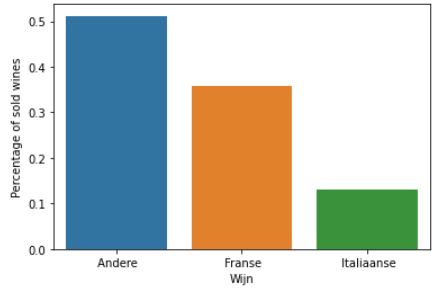

In [13]:
observed.loc['Geen']

Wijn
 Andere        43
 Franse        30
 Italiaanse    11
Name: Geen, dtype: int64

<AxesSubplot:xlabel='Wijn', ylabel='Geen'>

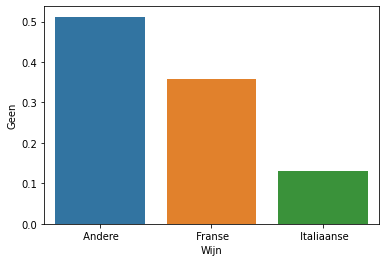

In [15]:
sns.barplot(x = observed.loc['Geen'].index, y = observed.loc['Geen'] / np.sum(observed.loc['Geen']))

Plot a clustered bar chart of the dataset  

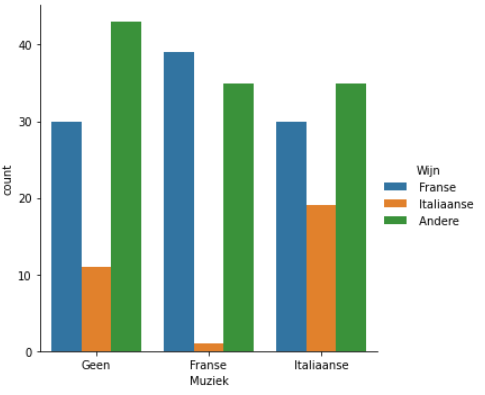

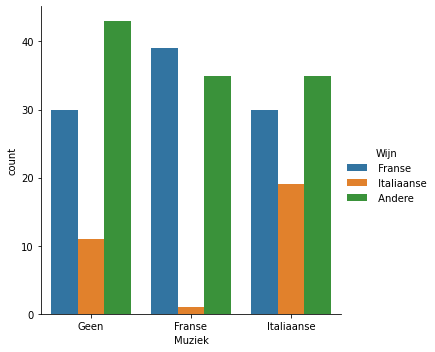

In [20]:
sns.catplot(data=music_wine, x='Muziek', hue='Wijn', kind='count')

Plot a bar chart (stacked bar chart) of the dataset

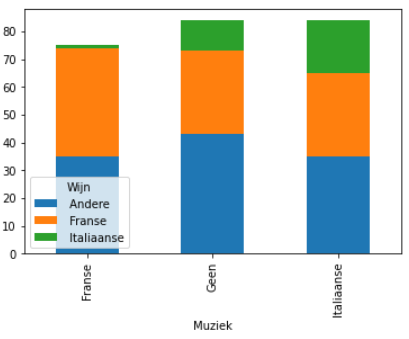

<AxesSubplot:xlabel='Muziek'>

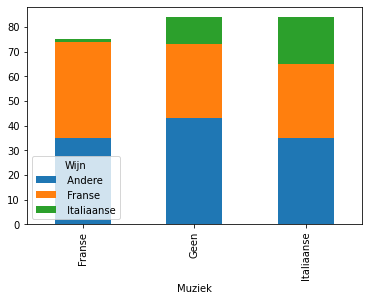

In [19]:
observed.plot(kind='bar', stacked=True)

## Labo 2 - Survey

Load the data file data/survey.csv. It contains the result of a survey of students from an Australian university.

We want to investigate the relationship between some discrete (nominal or ordinal) variables in this dataset. For any pairs of variables listed below, follow these steps:

* First, think about what exactly you expect for the given combination of variables.
* Make a frequency table for the two variables. The (presumably) independent variable comes first.
* Plot a graph visualizing the relationship between the two variables.
- Looking at the chart, do you expect a rather high or rather low value for the $\chi^2$ statistic? Why?
* Run the $\chi^2$ test to determine whether there is a relationship between the two variables. Calculate the $\chi^2$ statistic, the critical limit $g$ and the $p$ value, each for significance level $\alpha = 0.05$.
* Should we accept or reject the null hypothesis? What exactly does that mean for the relationship between the two variables? In other words, formulate an answer to the research question.
* Calculate Cramér's V. Do you come to a similar conclusion as with the $\chi^2$ test?


The variables to be investigated:

| Independent variabele          | Dependent variabele                        |
|:------------------------------ |:-------------------------------------------|
| `Exer` (practicing sports)     | `Smoke`                                    |
| `Sex` (gender)                 | `Smoke`                                    |
| `W.Hnd` (dominant hand)        | `Fold` (top hand when you cross your arms) |
| `Sex`                          | `W.Hnd`                                    |

Results of the main calculations (rounded up to 3 decimal places):

- `Exer/Smoke`: χ² ≈ 5.489, g ≈ 12.592, p ≈ 0.483
- `W.Hnd/Fold`: χ² ≈ 1.581, g ≈ 5.992, p ≈ 0.454
- `Sex/Smoke`: χ² ≈ 3.554, g ≈ 7.815, p ≈ 0.314
- `Sex/W.Hnd`: χ² ≈ 0.236, g ≈ 3.842, p ≈ 0.627

Read the dataset.

In [21]:
survey = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/survey.csv')
survey.head()

,Unnamed: 0,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
0,1,Female,18.5,18.0,Right,R on L,92.0,Left,Some,Never,173.0,Metric,18.250
1,2,Male,19.5,20.5,Left,R on L,104.0,Left,None,Regul,177.8,Imperial,17.583
2,3,Male,18.0,13.3,Right,L on R,87.0,Neither,None,Occas,NaN,NaN,16.917
3,4,Male,18.8,18.9,Right,R on L,NaN,Neither,None,Never,160.0,Metric,20.333
4,5,Male,20.0,20.0,Right,Neither,35.0,Right,Some,Never,165.0,Metric,23.667


What are the different values for Exer and Smoke?  
Change both variables to ordinal variables with a specific order.

In [22]:
print(survey.Exer.unique())
print(survey.Smoke.unique())

['Some' 'None' 'Freq']
['Never' 'Regul' 'Occas' 'Heavy' nan]


In [23]:
survey.Exer = survey.Exer.astype(CategoricalDtype(categories=['None', 'Some', 'Freq'], ordered=True))
survey.Smoke = survey.Smoke.astype(CategoricalDtype(categories=['Never', 'Occas', 'Regul', 'Heavy'], ordered=True))

In [24]:
survey.Smoke.describe()

count       236
unique        4
top       Never
freq        189
Name: Smoke, dtype: object

* Make a frequency table for the two variables. The (presumably) independent variable comes first.
* Plot a graph visualizing the relationship between the two variables.
* Looking at the chart, do you expect a rather high or rather low value for the  χ2  statistic? Why?
* Run the  χ2  test to determine whether there is a relationship between the two variables. Calculate the  χ2  statistic, the critical limit  g  and the  p  value, each for significance level  α=0.05 .
* Should we accept or reject the null hypothesis? What exactly does that mean for the relationship between the two variables? In other words, formulate an answer to the research question.
* Calculate Cramér's V. Do you come to a similar conclusion as with the  χ2  test?

The variables to be investigated:

| Independent variabele          | Dependent variabele                        |
|:------------------------------ |:-------------------------------------------|
| `Exer` (practicing sports)     | `Smoke`                                    |
| `Sex` (gender)                 | `Smoke`                                    |
| `W.Hnd` (dominant hand)        | `Fold` (top hand when you cross your arms) |
| `Sex`                          | `W.Hnd`                                    |

Results of the main calculations (rounded up to 3 decimal places):

- `Exer/Smoke`: χ² ≈ 5.489, g ≈ 12.592, p ≈ 0.483
- `W.Hnd/Fold`: χ² ≈ 1.581, g ≈ 5.992, p ≈ 0.454
- `Sex/Smoke`: χ² ≈ 3.554, g ≈ 7.815, p ≈ 0.314
- `Sex/W.Hnd`: χ² ≈ 0.236, g ≈ 3.842, p ≈ 0.627

Exer/Smoke: χ² ≈ 5.489, g ≈ 12.592, p ≈ 0.483

In [26]:
observed = pd.crosstab(survey.Exer, survey.Smoke)
chi2, p, df, expected = stats.chi2_contingency(observed)
alpha = 0.05
g = stats.chi2.isf(alpha, df)

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % df)
print("P-value           : %.4f" % p)
print("g-value           : %.4f" % g)

Chi-squared       : 5.4885
Degrees of freedom: 6
P-value           : 0.4828
g-value           : 12.5916


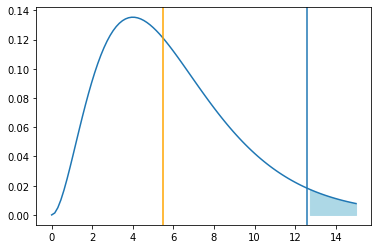

In [28]:
# x-values:
x = np.linspace(0, 15, num=100)

# probability density of the chi-squared distribution with 4 degrees of freedom
y = stats.chi2.pdf(x, df)

# the number q for which the right tail probability is exactly 5%:
q = stats.chi2.isf(alpha, df)  # TODO: CHECK this!

fig, tplot = plt.subplots(1, 1)
tplot.plot(x, y)                     # probability density
tplot.fill_between(x, y, where=x>=q, # critical area
    color='lightblue')
tplot.axvline(q)                     # critical value
tplot.axvline(chi2, color='orange')  # chi-squared

W.Hnd/Fold: χ² ≈ 1.581, g ≈ 5.992, p ≈ 0.454

In [33]:
observed = pd.crosstab(survey['W.Hnd'], survey.Fold)
chi2, p, df, expected = stats.chi2_contingency(observed)
alpha = 0.05
g = stats.chi2.isf(alpha, df)

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % df)
print("P-value           : %.4f" % p)
print("g-value           : %.4f" % g)

Chi-squared       : 1.5814
Degrees of freedom: 2
P-value           : 0.4535
g-value           : 5.9915


Sex/Smoke: χ² ≈ 3.554, g ≈ 7.815, p ≈ 0.314

In [34]:
observed = pd.crosstab(survey.Sex, survey.Smoke)
chi2, p, df, expected = stats.chi2_contingency(observed)
alpha = 0.05
g = stats.chi2.isf(alpha, df)

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % df)
print("P-value           : %.4f" % p)
print("g-value           : %.4f" % g)

Chi-squared       : 3.5536
Degrees of freedom: 3
P-value           : 0.3139
g-value           : 7.8147


Sex/W.Hnd: χ² ≈ 0.236, g ≈ 3.842, p ≈ 0.627

In [35]:
observed = pd.crosstab(survey['Sex'], survey['W.Hnd'])
chi2, p, df, expected = stats.chi2_contingency(observed)
alpha = 0.05
g = stats.chi2.isf(alpha, df)

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % df)
print("P-value           : %.4f" % p)
print("g-value           : %.4f" % g)

Chi-squared       : 0.2356
Degrees of freedom: 1
P-value           : 0.6274
g-value           : 3.8415


## Labo 3 - Digimeter

Every year, Imec (formerly iMinds) carries out a study on the use of digital technologies in Flanders, the Digimeter (Vanhaelewyn & De Marez, 2016). In this exercise we will check whether the sample of the Digimeter 2016 (n = 2164) is representative of the population in terms of the age categories of the participants.

You can find the frequency tables in the following data files:

- `data/leeftijden-digimeter.csv`: relative frequencies of the age of participants in the iMec Digimeter 2016 and the Flemish population (as reported in the Digimeter publication)
- `data/leeftijden-bestat-vl.csv`: absolute frequencies for the different age categories of the Flemish population (Source: BelStat, <https://bestat.economie.fgov.be/bestat/> , C01.1: Population by place of residence (province), sex, position in the household (C), marital status and age (B)).  


1. The table with age data for the Flemish population as a whole has more categories than the one used in the Digimeter. Make a summary so that you have the same categories as those of the Digimeter.
2. In order to apply the goodness-of-fit test, we need the absolute frequencies of the observed values ​​in the sample. Calculate this.
3. Also calculate the expected percentages ($\pi_i$) for the population as a whole.
4. Perform the goodness-of-fit test on the distribution of age categories in the Digimeter sample. In this respect, is the sample indeed representative of the Flemish population?

Results of the main calculations (rounded up to 3 decimal places):

- χ² ≈ 6.700 (df = 6),
- g ≈ 12.592,
- p ≈ 0.350

Read the dataset `data/leeftijden-digimeter.csv`  
Make sure the Percentages are actually percentages.


In [36]:
# Read dataset
ld = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/leeftijden-digimeter.csv')
ld.head(10)

,Leeftijdsgroep,Percentage
0,15-19,6.6
1,20-29,14.2
2,30-39,15.0
3,40-49,16.3
4,50-59,17.3
5,60-64,7.3
6,64+,23.2


Read the dataset `leeftijden-bestat-vl.csv`

In [37]:
# Read dataset
bestat = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/leeftijden-bestat-vl.csv')
bestat.head(25)

,age.group,population
0,0-5,352017
1,5-9,330320
2,10-14,341303
3,15-19,366648
4,20-24,375469
5,25-29,387131
6,30-34,401285
7,35-39,409587
8,40-44,458485
9,45-49,493720


1. The table with age data for the Flemish population as a whole has more categories than the one used in the Digimeter. Make a summary so that you have the same categories as those of the Digimeter.

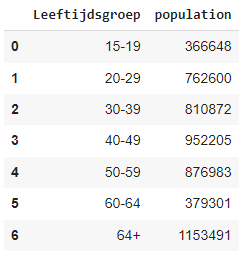

In [38]:
bestat = bestat[(bestat['age.group'] != '0-5') & (bestat['age.group'] != '5-9') & (bestat['age.group'] != '10-14') ]
bestat.head()

,age.group,population
3,15-19,366648
4,20-24,375469
5,25-29,387131
6,30-34,401285
7,35-39,409587


2. In order to apply the goodness-of-fit test, we need the absolute frequencies of the observed values ​​in the sample. Calculate these.  
Answer = [142.824 307.288 324.6   352.732 374.372 157.972 502.048]

In [ ]:
#De observed waarden zijn te halen uit de dataset digi:
observed = np.array(digi['Percentage'])/100*n
print(observed)

3. Also calculate the expected percentages ($\pi_i$) for the population as a whole.  
Answer = [0.06915147 0.1438298  0.15293412 0.17959016 0.16540295 0.07153788
 0.21755361]

In [ ]:
#hierboven reeds gedaan

4. Perform the goodness-of-fit test on the distribution of age categories in the Digimeter sample. In this respect, is the sample indeed representative of the Flemish population?  

Results of the main calculations (rounded up to 3 decimal places):

χ² ≈ 6.700 (df = 6),
g ≈ 12.592,
p ≈ 0.350

In [ ]:
alpha = 0.05
k=len(observed)
df=k-1

# Calculate critical value
g = stats.chi2.isf(alpha, df)


#Goodness of fit test in python:
chi2, p = stats.chisquare(f_obs=observed, f_exp=expected)

print("Significance level  ⍺ = %.2f" % alpha)
print("Sample size         n = %d" % n)
print("k = %d; df = %d" % (k, df))
print("Chi-squared        χ² = %.4f" % chi2)
print("Critical value      g = %.4f" % g)
print("p-value             p = %.4f" % p)

In [ ]:
# Plot of the case:
# x-values:
x = np.linspace(0, 15, num=100)
# probability density of the chi-squared distribution with 4 degrees of freedom
y = stats.chi2.pdf(x, df=df)
# the number g for which the right tail probability is exactly 5%:
g = stats.chi2.isf(alpha, df)

fig, tplot = plt.subplots(1, 1)
tplot.plot(x, y)                     # probability density
tplot.fill_between(x, y, where=x>=g, # critical area
    color='lightblue')
tplot.axvline(g)                     # critical value
tplot.axvline(chi2, color='orange')  # chi-squared